In [ ]:
%load_ext autoreload
%autoreload 2

# 2. Logistic regression

## 2.1. Implementing the components of logistic regression

The logistic regression classifier can be considered as an extension of linear regression. For a binary classification problem (a classification problem with two classes), logistic regression predicts the probability that a sample **x** belongs to one of the classes:

$$
p(y=1 | \mathbf{x})=\sigma\left(\boldsymbol{\theta}^{\top} \mathbf{x}\right)
$$

We can view this expression as passing the output from a linear regression model $\boldsymbol{\theta}^\intercal \mathbf{x}$ through the sigmoid function $\sigma(\cdot)$ that "squashes" the value between 0 and 1 making it possible to be interpreted as a probability.

The loss function for logistic regression is the negative log-likelihood (NLL):

$$
J(\theta)=-\sum_{i=1}^{N} y_{i} \log p\left(y=1 | \mathbf{x}_{i}, \theta\right)+\left(1-y_{i}\right) \log \left\{1-p\left(y=1 | \mathbf{x}_{i}, \theta\right)\right\}
$$

Compared to linear regression, there is no closed-form solution for the optimal parameters of the model (we cannot set the derivative of $J(\boldsymbol\theta)$ to zero and solve for $\boldsymbol\theta$). The NLL loss is optimised with the gradient descent method, similar to intensity-based image registration covered in the Registration topic of this course.

The provided `logistic_regression()` Python script in `# SECTION 2` of the `cad_tests.py` module implements all necessary steps for training a logistic regression model on a toy dataset. However, the code will not work as is because two of the functions it depends on (`sigmoid()` and `lr_nll()`) are not implemented yet.


### (A)
### EXERCISE:
Implement the computation of the sigmoid function in `sigmoid()` in `# SECTION 2` of the `cads.py` module. You will test your implementation in the next exercise.

### (B)
### EXERCISE:
Implement the computation of the negative log-likelihood in `lr_nll` in `# SECTION 2` of the `cads.py` module. You will test your implementation in the next exercise.

### (C)
### QUESTION:
Suppose that you have two logistic regression models that predict $p(y=1 | \mathbf{x})$ and a validation dataset with three samples with labels 1, 0 and 1. The first model predicts the following probabilities for the three validation samples: 0.9, 0.4 and 0.7. The second model predicts 0.7. 0.5 and 0.9. Which of the two models has a better performance on the validation set? How did you come to this conclusion?

## 2.2. Implementing logistic regression

The provided `logistic_regression()` Python script implements all necessary steps for training a logistic regression model on a toy dataset. 

The first part of the script generates and visualises a dataset for a binary classification problem. The code generates both a training and a validation dataset, which can be used to monitor for overfitting  during the training process. The second part implements training of logistic regression with stochastic gradient descent. The training process is visualised in two ways: a scatter plot of the training data along with the linear decision boundary, and a plot of the training and validation loss as a function of the number of iterations (this is similar to the plot of the similarity vs. the number of iteration for intensity-baser image registration).

Read through the code and comments and make sure you understand what it does (you can skip the visualisation part as it is not relevant for understanding logistic regression and stochastic gradient desent).

If you have implemented `sigmoid()` and `lr_nll()` correctly and run `logistic_regression()`, the results should look like on the figure below (it will most likely not be exactly the same as the toy dataset is randomly generated). 

<img src="../notebooks/assets/logreg_training.png" align="center"/>



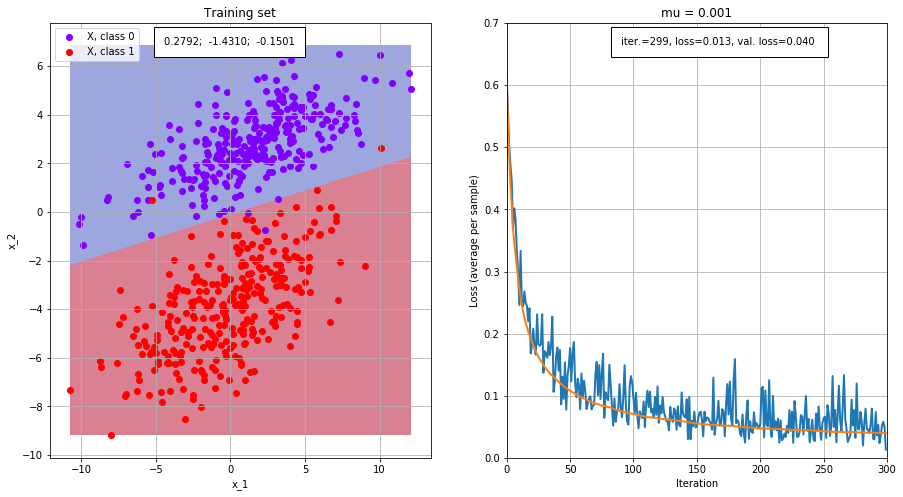

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from IPython.display import display, clear_output, HTML
from cad_tests import logistic_regression

logistic_regression()

### (A)
### QUESTION:
What is the difference between "regular" gradient descent and stochastic gradient descent? What is the advantage of one over the other?

### (B)
### QUESTION:
In the figure above, the training loss curve has a noisy appearance, whereas the validation loss curve is relatively smooth. Why is this the case (HINT: How will the appearance of the training loss curve change if you increase the batch size parameter?).

### (C)
### QUESTION:
Based on the training curves in the figure above, would you say that the model has overfitted the training dataset? Motivate your answer.

### (D)
### QUESTION:
Assuming that you have trained a model and are satisfied with the generalisation performance, how can you use the model to predict the class label $y$ for an unknown test sample $\mathbf{x}$. (HINT: Remember that the model predicts a probability. How can this probability be converted to a binary class label?).